<a href="https://colab.research.google.com/github/AnnalisaOri/Progetti/blob/main/finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esempio di albero binomiale

Immaginiamo un mercato con due soli periodi, \(t = 0,1\), presente e futuro.  
Alla data futura sono possibili solo due scenari, \(\omega \in \{H,T\} \equiv \Omega\), ossia **testa (H)** o **croce (T)**.  

Il prezzo dello stock \(S\) segue un processo binomiale, mentre il bond è privo di rischio.

La formula per il prezzo atteso è:

\[
C = e^{-r \Delta t} \left[ q C_u + (1-q) C_d \right]
\]

dove:
- \(r\) è il tasso privo di rischio  
- \(q\) è la probabilità risk-neutral  
- \(C_u, C_d\) sono i valori dell'opzione nei nodi successivi  


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
K = 100      # Strike price
T = 1        # Tempo in anni
S0 = 100     # Prezzo iniziale
r = 0.05     # Tasso privo di rischio
N = 3        # Numero di periodi
u = 1.2      # Fattore up
d = 0.8      # Fattore down

def binomial_tree(K, T, S0, r, N, u, d):
    dt = T/N
    q = (np.exp(r*dt) - d) / (u - d)
    disc = np.exp(-r*dt)

    S = S0 * d**(np.arange(N,-1,-1)) * u**(np.arange(0,N+1))
    C = np.maximum(S - K, 0)

    for i in range(N,0,-1):
        C = disc * (q*C[1:i+1] + (1-q)*C[0:i])
    return C[0]

prezzo_opzione = binomial_tree(K,T,S0,r,N,u,d)
print(f"Prezzo dell'opzione call: {prezzo_opzione:.2f}")


Prezzo dell'opzione call: 16.86


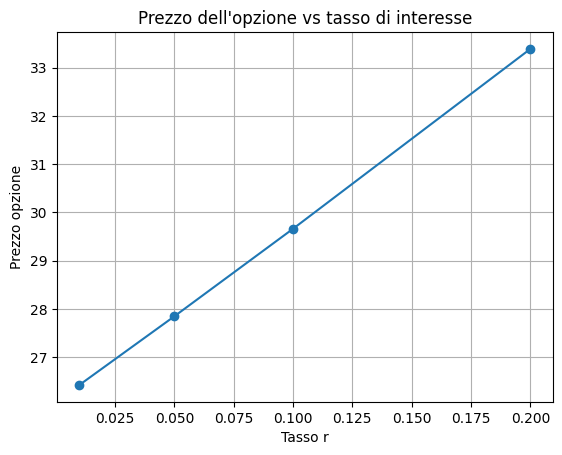

In [4]:
# Grafico esempio
# Parametri per il grafico
K = 105
T = 1
S0 = 100
N = 50 # Numero di passi
u = 1.1
d = 0.9

tassi = [0.01, 0.05, 0.1, 0.2]
prezzi = [binomial_tree(K,T,S0,r,N,u,d) for r in tassi]

plt.plot(tassi, prezzi, marker='o')
plt.title("Prezzo dell'opzione vs tasso di interesse")
plt.xlabel("Tasso r")
plt.ylabel("Prezzo opzione")
plt.grid(True)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_tree(K, T, S0, r, N, u, d, option_type='call'):
    """
    Calcola il prezzo di un'opzione utilizzando il modello dell'albero binomiale.

    Args:
        K (float): Strike price.
        T (float): Tempo alla scadenza (in anni).
        S0 (float): Prezzo iniziale dello stock.
        r (float): Tasso di interesse privo di rischio annuo.
        N (int): Numero di passi temporali.
        u (float): Fattore di aumento del prezzo dello stock.
        d (float): Fattore di diminuzione del prezzo dello stock.
        option_type (str): Tipo di opzione ('call' o 'put').

    Returns:
        float: Prezzo dell'opzione al tempo t=0.
    """
    dt = T / N  # Durata di ciascun passo temporale
    q = (np.exp(r * dt) - d) / (u - d)  # Probabilità risk-neutral

    # Inizializzazione dei prezzi dello stock all'ultimo passo temporale (T)
    stock_prices = np.zeros(N + 1)
    for j in range(N + 1):
        stock_prices[j] = S0 * (u**(N - j)) * (d**j)

    # Inizializzazione dei valori dell'opzione all'ultimo passo temporale (T)
    option_values = np.zeros(N + 1)
    for j in range(N + 1):
        if option_type == 'call':
            option_values[j] = max(0, stock_prices[j] - K)
        elif option_type == 'put':
            option_values[j] = max(0, K - stock_prices[j])
        else:
            raise ValueError("option_type deve essere 'call' o 'put'")

    # Calcolo dei valori dell'opzione a ritroso nel tempo
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = np.exp(-r * dt) * (q * option_values[j] + (1 - q) * option_values[j + 1])

    return option_values[0]